# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | aripuana
Processing Record 3 of Set 1 | wick
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | yasinya
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | lindi
Processing Record 8 of Set 1 | masterton
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | palopo
Processing Record 12 of Set 1 | kulhudhuffushi
Processing Record 13 of Set 1 | victoria de durango
Processing Record 14 of Set 1 | alo
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | fort mcmurray
Processing Record 21 of Set 1 | duong dong
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,293.37,83,56,4.47,EC,1722901152
1,aripuana,-9.1667,-60.6333,299.19,37,2,1.14,BR,1722901153
2,wick,58.4333,-3.0833,285.18,100,75,2.06,GB,1722901154
3,nemuro,43.3236,145.5750,290.40,97,89,3.37,JP,1722901155
4,yasinya,48.2794,24.3604,285.45,99,100,1.08,UA,1722901156


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,293.37,83,56,4.47,EC,1722901152
1,aripuana,-9.1667,-60.6333,299.19,37,2,1.14,BR,1722901153
2,wick,58.4333,-3.0833,285.18,100,75,2.06,GB,1722901154
3,nemuro,43.3236,145.5750,290.40,97,89,3.37,JP,1722901155
4,yasinya,48.2794,24.3604,285.45,99,100,1.08,UA,1722901156


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

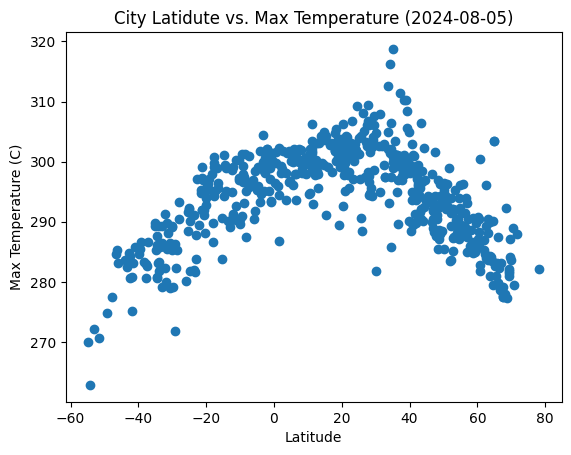

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latidute vs. Max Temperature (2024-08-05)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

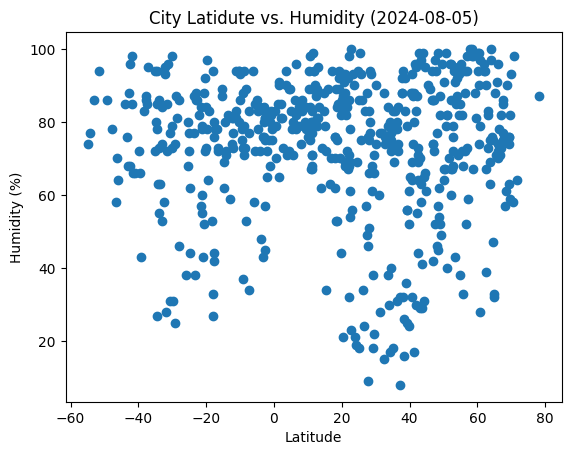

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latidute vs. Humidity (2024-08-05)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

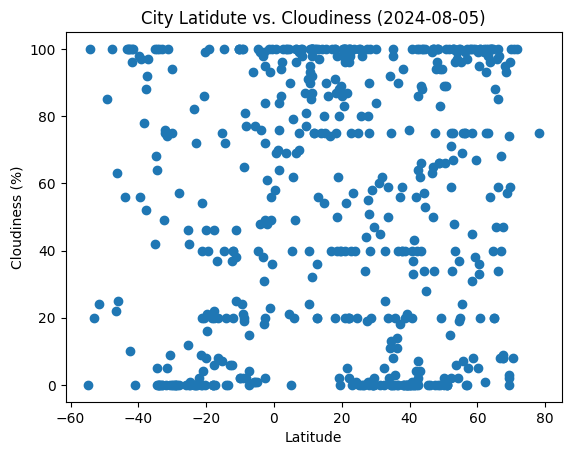

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latidute vs. Cloudiness (2024-08-05)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

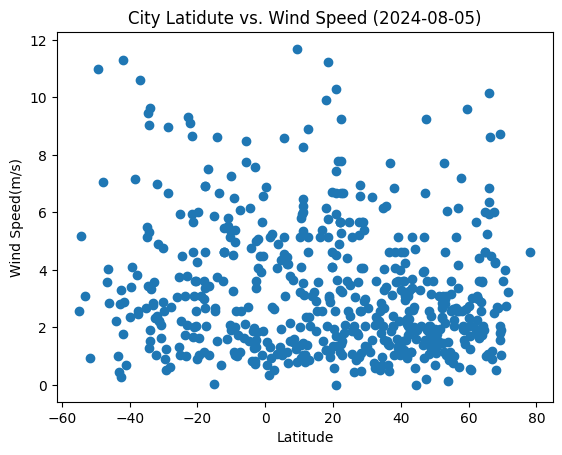

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latidute vs. Wind Speed (2024-08-05)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linreg(dataframe, columnx, columny):
    slope, intercept, r, p, stderr = linregress(dataframe[columnx], dataframe[columny])
    print(f"the r^2 is: {r**2}")
    equation = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.figure(figsize=(6, 5))
    plt.scatter(dataframe[columnx], dataframe[columny])

    regression_line = slope * dataframe[columnx] + intercept
    plt.plot(dataframe[columnx], regression_line, color='red', label='Regression line')

    plt.xlabel(columnx)
    plt.ylabel(columny)
    plt.title(f"{columnx} vs {columny}")
    plt.annotate(equation, xy=(0.1, 0.2), xycoords= "axes fraction",fontsize=12, color="red")
    plt.legend()
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df =  city_data_df[city_data_df['Lat'] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,wick,58.4333,-3.0833,285.18,100,75,2.06,GB,1722901154
3,nemuro,43.3236,145.5750,290.40,97,89,3.37,JP,1722901155
4,yasinya,48.2794,24.3604,285.45,99,100,1.08,UA,1722901156
5,badger,64.8000,-147.5333,303.35,32,20,4.63,US,1722901157
11,kulhudhuffushi,6.6221,73.0700,300.94,78,100,4.20,MV,1722901164


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df =  city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,293.37,83,56,4.47,EC,1722901152
1,aripuana,-9.1667,-60.6333,299.19,37,2,1.14,BR,1722901153
6,lindi,-10.0000,39.7167,290.43,93,2,1.91,TZ,1722901159
7,masterton,-40.9597,175.6575,285.86,66,0,0.71,NZ,1722901160
8,atafu village,-8.5421,-172.5159,301.30,73,81,2.58,TK,1722901161


###  Temperature vs. Latitude Linear Regression Plot

the r^2 is: 0.46420714423535187


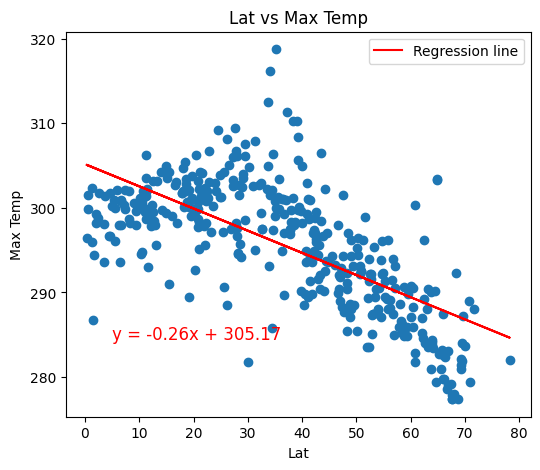

In [34]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df, "Lat", "Max Temp")

the r^2 is: 0.6741570088252835


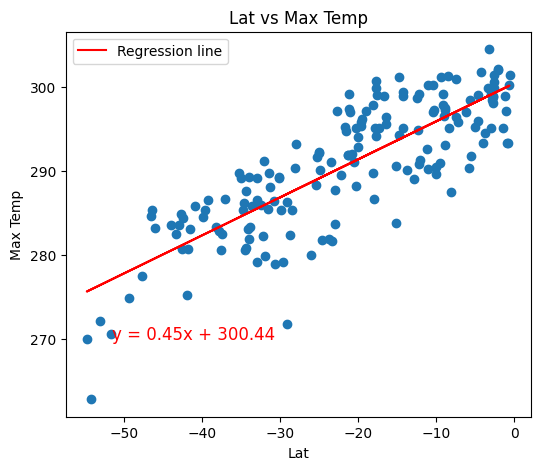

In [37]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linreg(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r^2 is: 0.00037771322854995506


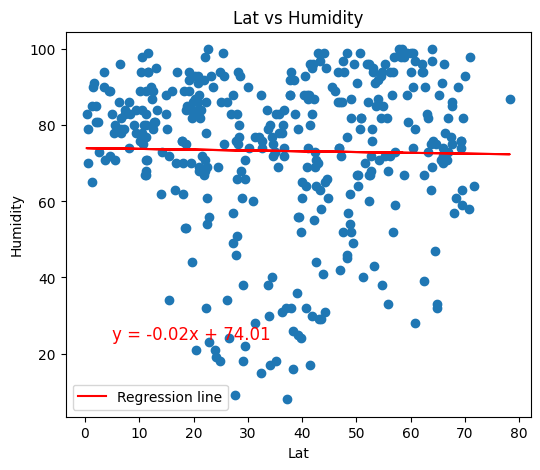

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df, "Lat", "Humidity")

the r^2 is: 0.00015984009300126523


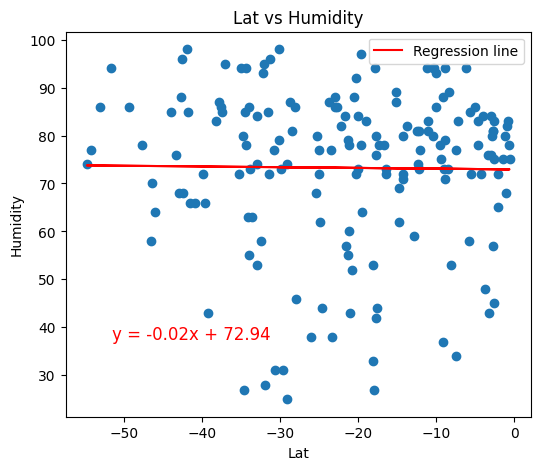

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
linreg(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r^2 is: 0.015078025748618822


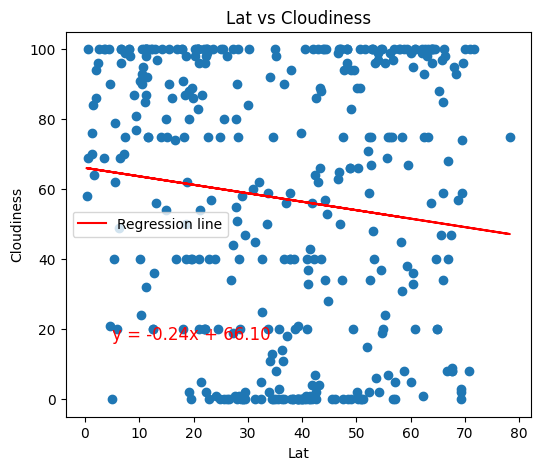

In [40]:
# Northern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df, "Lat", "Cloudiness")

the r^2 is: 0.003851443826772403


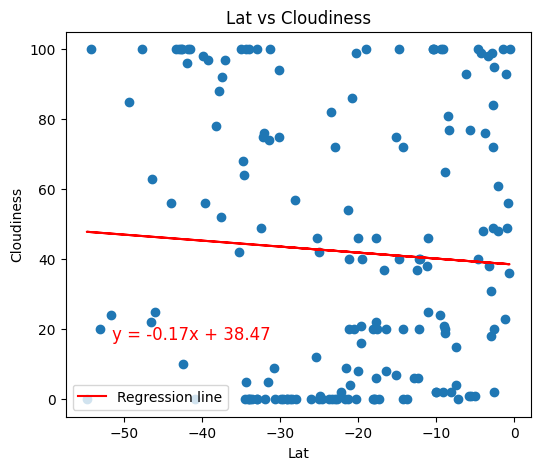

In [41]:
# Southern Hemisphere
# YOUR CODE HERE
linreg(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r^2 is: 0.007450777134738983


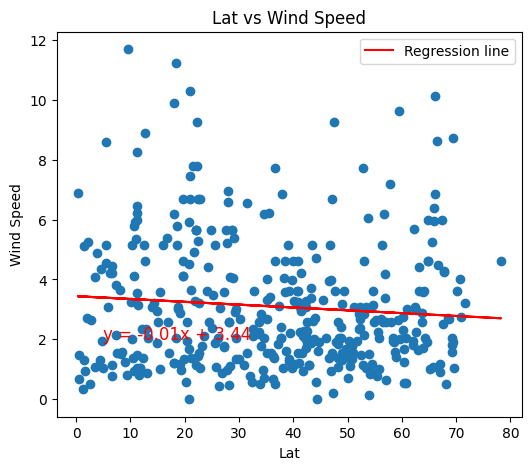

In [42]:
# Northern Hemisphere
# YOUR CODE 
linreg(northern_hemi_df, "Lat", "Wind Speed")

the r^2 is: 0.0018143412593338408


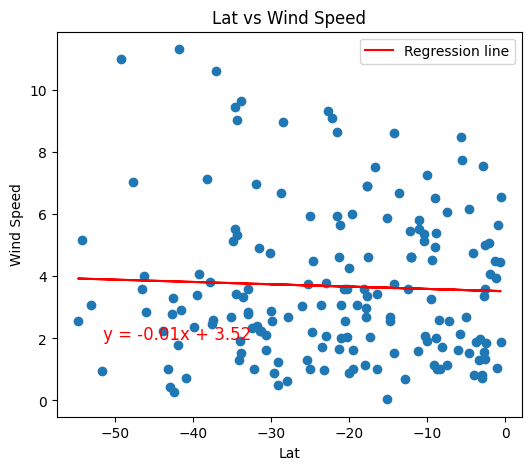

In [43]:
# Southern Hemisphere
# YOUR CODE HERE
linreg(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
"the only plots that display a strong correlation are the latitude vs temperature charts, which display a rising temperature with proximity to the equator"